In [1]:
import numpy as np
from pprint import pprint
import sys
import pandas

In [2]:
def print_result(x, indent_str='  ', indent_level=0, iskey=False, file=sys.stdout):
    from qiskit_metal import Dict
    import pandas
    import numpy as np
    import collections
    pandas.set_option('display.expand_frame_repr', False)
    
    create_file = type(file) is str
    if create_file:
        file = open(file, mode='w')
    
    if iskey:
        x = "'" + x + "'" if type(x) is str else x
        print(indent_str * indent_level + str(x) + ':', file=file)
        return
        
    if type(x) in {dict, Dict, collections.OrderedDict}:
        for k, v in x.items():
            print_result(k, indent_str, indent_level, iskey=True, file=file)
            print_result(v, indent_str, indent_level+1, file=file)
    elif type(x) in {pandas.core.frame.DataFrame, pandas.core.series.Series}:
        print(indent_str * indent_level + 'type: ' + str(type(x)), file=file)
        s = str(x)
        for line in s.splitlines():
            print(indent_str * indent_level + line, file=file)
    elif type(x) is str:
        print("'" + x + "'", file=file)
    else:
        if type(x) not in {int, float, np.float32, np.float64, np.int32, np.int64}:
            print(indent_str * indent_level + 'type: ' + str(type(x)), file=file)
        s = str(x)
        for line in s.splitlines():
            print(indent_str * indent_level + line, file=file)
    
    if create_file:
        file.close()
    return

In [3]:
dataEPR = np.load('dataEPR.npz', allow_pickle=True)
type(dataEPR)

dict

In [4]:
print_result(dataEPR, file='dataEPR.txt', indent_str=' '*2)

In [6]:
pms = '0.586544  0.210903  0.000073  0.164386'.split()
pms = [float(x) for x in pms]
sum(pms)

0.961906

In [5]:
import pandas
import matplotlib.pyplot as plt

In [3]:
f_convergence = pandas.read_csv('hfss_eig_f_convergence.csv')

[]

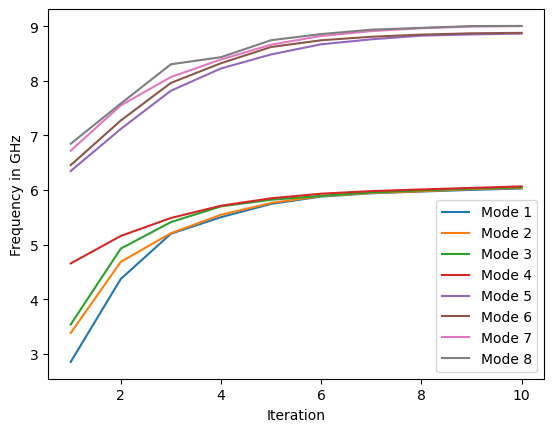

In [9]:
for m in range(1, 9):
    plt.plot(f_convergence['Pass []'], f_convergence[f're(Mode({m})) [g]'], label=f'Mode {m}')
plt.legend()
plt.ylabel('Frequency in GHz')
plt.xlabel('Iteration')
plt.plot()